### Resources:
- [Texas Department of State Health Services](https://dshs.texas.gov/coronavirus/additionaldata.aspx)

original data from Texas DSHS was provided in excel format. 

Prior ro importing the files to jupyter notebook, I deleted the first two rows, containing the title and a disclaimer, and saved the new changes as a csv file.

Files to be used:
- Total cases by county (data collected from 3/4/2020 - 10/22/2020)
- Total Fatalities by county (data collected from 3/7/2020 - 10/22/2020)

### Content
- [Total cases data](#Total-cases-data)
- [Total fatality data](#Total-fatality-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total cases data

In [2]:
total_cases_df = pd.read_csv('../data/preprocessing/Texas_total_cases_oct-22.csv')

In [3]:
total_cases_df.head()

,County Name,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-04,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-05,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-06,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-09,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-10,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-11,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-12,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-13,Cases \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n03-15,...,Cases 10-13,Cases 10-14,Cases 10-15,Cases 10-16,Cases 10-17,Cases 10-18,Cases 10-19,Cases 10-20,Cases 10-21,Cases 10-22
0,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2892.0,2885.0,2903.0,2906.0,2909.0,2909.0,2909.0,2920.0,2922.0,2934.0
1,Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,518.0,518.0,518.0,547.0,547.0,547.0,547.0,549.0,567.0,567.0
2,Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2221.0,2221.0,2221.0,2251.0,2251.0,2251.0,2251.0,2251.0,2277.0,2277.0
3,Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,340.0,340.0,340.0,340.0,341.0,341.0,341.0,340.0,340.0,340.0
4,Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.0,103.0,105.0,106.0,114.0,114.0,114.0,114.0,133.0,133.0


In [5]:
total_cases_df.shape

(255, 222)

In [8]:
#column names are not in the right format
#also March7, 8, and 14 are missing from this file

#making a list of dates between these two dates
date1 = '2020-03-04'
date2 = '2020-10-22'
mydates = pd.date_range(date1, date2).tolist()

In [9]:
del mydates[3:5]

In [10]:
mydates[8]

Timestamp('2020-03-14 00:00:00', freq='D')

In [11]:
del mydates[8]

In [12]:
len(mydates)

230

In [13]:
new_dates = []
for date in mydates:
    date =  str(date)
    new_dates.append(date[:10])

In [14]:
new_columns = ['county_name'] + new_dates
new_columns[:6]

['county_name',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10']

In [15]:
total_cases_df.columns = new_columns

In [16]:
total_cases_df.head()

,county_name,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-15,...,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22
0,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2892.0,2885.0,2903.0,2906.0,2909.0,2909.0,2909.0,2920.0,2922.0,2934.0
1,Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,518.0,518.0,518.0,547.0,547.0,547.0,547.0,549.0,567.0,567.0
2,Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2221.0,2221.0,2221.0,2251.0,2251.0,2251.0,2251.0,2251.0,2277.0,2277.0
3,Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,340.0,340.0,340.0,340.0,341.0,341.0,341.0,340.0,340.0,340.0
4,Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.0,103.0,105.0,106.0,114.0,114.0,114.0,114.0,133.0,133.0


In [26]:
total_cases_cleaned = total_cases_df[['county_name', '2020-10-21']]
total_cases_cleaned

,county_name,2020-10-21
0,Anderson,2922.0
1,Andrews,567.0
2,Angelina,2277.0
3,Aransas,340.0
4,Archer,133.0
...,...,...
250,Yoakum,289.0
251,Young,497.0
252,Zapata,342.0
253,Zavala,452.0


In [27]:
total_cases_cleaned.dropna(inplace=True)

<ipython-input-27-e1729d5c2e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_cases_cleaned.dropna(inplace=True)


In [23]:
total_cases_cleaned.head(2)

,county_name,2020-10-22
0,Anderson,2934.0
1,Andrews,567.0


In [28]:
total_cases_cleaned.rename(columns={'2020-10-21': 'total_cases'}, inplace=True)

/Users/ferasaltwal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [29]:
total_cases_cleaned

,county_name,total_cases
0,Anderson,2922.0
1,Andrews,567.0
2,Angelina,2277.0
3,Aransas,340.0
4,Archer,133.0
...,...,...
249,Wood,621.0
250,Yoakum,289.0
251,Young,497.0
252,Zapata,342.0


# Total fatality data

In [22]:
total_fatality_df = pd.read_csv('../data/preprocessing/Texas_total_fatalities_oct-22.csv')
total_fatality_df

,County Name,Fatalities 03-07,Fatalities 03-08,Fatalities 03-09,Fatalities 03-10,Fatalities 03-11,Fatalities 03-12,Fatalities 03-13,Fatalities 03-14,Fatalities 03-15,...,Fatalities 10-12,Fatalities 10-13,Fatalities 10-14,Fatalities 10-15,Fatalities 10-16,Fatalities 10-17,Fatalities 10-18,Fatalities 10-19,Fatalities 10-20,Fatalities 10-21
0,ANDERSON,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,39,39,39,39,39
1,ANDREWS,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2,ANGELINA,0,0,0,0,0,0,0,0,0,...,89,89,89,90,90,90,90,90,90,90
3,ARANSAS,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
4,ARCHER,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,WOOD,0,0,0,0,0,0,0,0,0,...,34,35,36,36,36,36,36,36,36,36
250,YOAKUM,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
251,YOUNG,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
252,ZAPATA,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


fatalities columns look clean already. will not be changing them for now

In [31]:
total_fatality_cleaned = total_fatality_df[['County Name', 'Fatalities 10-21']]
total_fatality_cleaned

,County Name,Fatalities 10-21
0,ANDERSON,39
1,ANDREWS,10
2,ANGELINA,90
3,ARANSAS,18
4,ARCHER,1
...,...,...
249,WOOD,36
250,YOAKUM,5
251,YOUNG,6
252,ZAPATA,9


In [32]:
total_fatality_cleaned.rename(columns={'County Name':'county_name', 'Fatalities 10-21': 'total_fatalities'}, inplace=True)
total_fatality_cleaned

/Users/ferasaltwal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,county_name,total_fatalities
0,ANDERSON,39
1,ANDREWS,10
2,ANGELINA,90
3,ARANSAS,18
4,ARCHER,1
...,...,...
249,WOOD,36
250,YOAKUM,5
251,YOUNG,6
252,ZAPATA,9


### Merging the two datasets

In [33]:
texas_combined = pd.merge(total_cases_cleaned, total_fatality_cleaned, 
                          on='county_name', left_index=True, right_index=True)

In [80]:
texas_combined.head(10)

,county_name,total_cases,total_fatalities,death_rate
0,Anderson,2922.0,39,0.013347
1,Andrews,567.0,10,0.017637
2,Angelina,2277.0,90,0.039526
3,Aransas,340.0,18,0.052941
4,Archer,133.0,1,0.007519
5,Armstrong,21.0,1,0.047619
6,Atascosa,1265.0,35,0.027668
7,Austin,509.0,9,0.017682
8,Bailey,264.0,5,0.018939
9,Bandera,184.0,8,0.043478


In [ ]:
death_rate1 = []
for i, n in zip(texas_combined['total_cases'], texas_combined['total_fatalities']):
    if i == 0:
        rate=0
    else:
        rate = n/i
        death_rate1.append(rate)

In [67]:
len(death_rate1)

253

In [68]:
len(texas_combined)

254

In [71]:
texas_combined['death_rate'] = texas_combined['total_fatalities']/texas_combined['total_cases']

In [73]:
texas_combined.sample(30)

,county_name,total_cases,total_fatalities,death_rate
206,Schleicher,55.0,2,0.036364
117,Irion,13.0,0,0.000000
200,Rusk,990.0,21,0.021212
98,Hardeman,60.0,1,0.016667
10,Bastrop,1949.0,31,0.015906
234,Victoria,4224.0,97,0.022964
135,Kinney,72.0,1,0.013889
253,Zavala,452.0,18,0.039823
158,Martin,86.0,144,1.674419
46,Comanche,348.0,5,0.014368


In [75]:
texas_combined[texas_combined['total_fatalities']==0]

,county_name,total_cases,total_fatalities,death_rate
16,Borden,2.0,0,0.0
32,Carson,52.0,0,0.0
37,Childress,107.0,0,0.0
43,Collingsworth,20.0,0,0.0
60,Denton,13773.0,0,0.0
77,Foard,20.0,0,0.0
86,Glasscock,12.0,0,0.0
102,Hartley,168.0,0,0.0
105,Hemphill,133.0,0,0.0
117,Irion,13.0,0,0.0


In [76]:
texas_combined['death_rate'].fillna(0, inplace=True)

In [77]:
texas_combined[149:152]

,county_name,total_cases,total_fatalities,death_rate
149,Llano,165.0,2,0.012121
150,Loving,0.0,0,0.000000
151,Lubbock,16130.0,158,0.009795


In [ ]:
texas_combined.to_csv('../data/texas_combined_cleaned_no_Census_FA.csv', index=False)

### Merging Census data

In [243]:
census_df = pd.read_csv('../data/tx_cleaned_numbers.csv')
census_df.head()

,county_state,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,"Austin County, Texas",29565,7819,18525,2576,48,89,0,52,456,...,2150,551,529,65365,80769,30858,33993,55417,38603,45.731424
1,"Kenedy County, Texas",595,522,72,0,0,1,0,0,0,...,8,0,0,36125,40908,15820,29453,40848,23295,0.407967
2,"Nueces County, Texas",360486,228462,107652,13071,919,7134,242,226,2780,...,18198,6452,5780,55048,74820,27649,30869,48043,34488,430.012072
3,"Colorado County, Texas",21022,6200,11855,2655,27,7,0,0,278,...,678,428,329,49504,70324,27861,30469,41853,34692,21.891440
4,"San Patricio County, Texas",67046,38483,26032,1003,101,671,30,7,719,...,3112,1483,767,55229,71588,25281,31318,50594,31847,96.686644


In [244]:
#changing county names in census_df to match the style in texas_combined datasetv
county_names_census = []

for county in census_df['county_state']:
    if len(county.split()) == 3:
        county = county.split()[0]
        county = county.upper()
    elif len(county.split()) == 4:
        county = county.split()[0]+ ' ' + county.split()[1]
        county = county.upper()
    
    county_names_census.append(county)

In [245]:
county_names_census[:5]

['AUSTIN', 'KENEDY', 'NUECES', 'COLORADO', 'SAN PATRICIO']

In [246]:
census_df['county_state'] = county_names_census

In [247]:
census_df.sample(10)

,county_state,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
93,GAINES,20321,8375,11299,391,93,95,13,44,11,...,815,318,237,59032,74857,22710,32571,49333,27473,13.526016
24,JIM HOGG,5282,4890,371,2,0,0,0,0,19,...,146,30,47,32049,51120,17798,22464,48097,22266,4.648940
161,NAVARRO,48583,13013,27526,6124,169,309,539,88,815,...,1943,652,560,47920,64220,23422,27381,40466,33223,48.119513
25,MONTGOMERY,554445,131147,370662,25296,805,15610,299,684,9942,...,32753,16584,25176,77416,110807,39618,40848,64402,46428,531.778984
197,HASKELL,5809,1665,3758,192,33,44,0,7,110,...,197,43,31,46013,53831,21308,26002,37900,30476,6.432054
199,NEWTON,14057,497,10335,2771,21,166,0,0,267,...,569,151,61,40950,54380,21144,30362,51548,31327,15.055528
225,MCMULLEN,662,332,326,0,4,0,0,0,0,...,23,16,25,68750,91265,32556,35500,58750,31875,0.580804
11,ZAVALA,12131,11372,602,60,0,4,0,0,93,...,129,9,6,30988,39610,13350,19020,31708,22638,9.350188
231,GARZA,6288,3272,2562,267,23,137,0,7,20,...,201,22,40,55039,71609,19177,25668,36124,31192,7.038170
91,BRAZOS,219193,55519,122867,22279,211,13706,46,296,4269,...,9410,3522,3987,46839,70257,26539,23430,45944,36787,374.360603


In [248]:
# changing the county column name to match the other dataset before joining
census_df.rename(columns={'county_state': 'county_name'}, inplace=True)

In [249]:
census_df.head(2)

,county_name,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,AUSTIN,29565,7819,18525,2576,48,89,0,52,456,...,2150,551,529,65365,80769,30858,33993,55417,38603,45.731424
1,KENEDY,595,522,72,0,0,1,0,0,0,...,8,0,0,36125,40908,15820,29453,40848,23295,0.407967


In [250]:
census_df.sort_values(by='county_name', ascending=True, inplace=True)

In [251]:
census_df.reset_index(inplace=True)

In [252]:
census_df.drop(columns='index', inplace=True)
census_df

,county_name,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,ANDERSON,57863,10142,34312,12127,158,319,9,15,781,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,ANDREWS,17818,9979,7215,321,0,63,21,0,219,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,ANGELINA,87607,19174,53216,12834,107,987,5,163,1121,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207
3,ARANSAS,24763,6756,16691,365,14,488,0,33,416,...,1047,476,496,44865,75471,30939,21567,43182,32005,98.246769
4,ARCHER,8789,727,7772,76,27,47,0,0,140,...,626,198,145,64476,80073,31806,32469,49105,37377,9.729998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,WOOD,43815,4313,36273,2335,277,133,37,34,413,...,1996,663,455,48534,68298,27841,28985,49656,34209,67.904439
250,YOAKUM,8571,5643,2763,25,11,5,0,29,95,...,557,153,142,68814,82418,26519,43250,68603,36103,10.717568
251,YOUNG,18114,3332,14176,354,112,89,0,0,51,...,1066,172,131,47194,64653,25855,30734,49142,27542,19.807588
252,ZAPATA,14369,13542,615,0,0,179,0,0,33,...,215,78,82,31113,52009,17228,18938,36461,24946,14.391854


In [253]:
texas_combined

,county_name,total_cases,total_fatalities,death_rate
0,Anderson,2922.0,39,0.013347
1,Andrews,567.0,10,0.017637
2,Angelina,2277.0,90,0.039526
3,Aransas,340.0,18,0.052941
4,Archer,133.0,1,0.007519
...,...,...,...,...
249,Wood,621.0,36,0.057971
250,Yoakum,289.0,5,0.017301
251,Young,497.0,6,0.012072
252,Zapata,342.0,9,0.026316


In [256]:
for i, n in zip(texas_combined['county_name'], census_df['county_name']):
    if i.upper() == n:
        print(i,' : ', n)
    else:
        print(i, ' : ', n, '---->','BAD')

Anderson  :  ANDERSON
Andrews  :  ANDREWS
Angelina  :  ANGELINA
Aransas  :  ARANSAS
Archer  :  ARCHER
Armstrong  :  ARMSTRONG
Atascosa  :  ATASCOSA
Austin  :  AUSTIN
Bailey  :  BAILEY
Bandera  :  BANDERA
Bastrop  :  BASTROP
Baylor  :  BAYLOR
Bee  :  BEE
Bell  :  BELL
Bexar  :  BEXAR
Blanco  :  BLANCO
Borden  :  BORDEN
Bosque  :  BOSQUE
Bowie  :  BOWIE
Brazoria  :  BRAZORIA
Brazos  :  BRAZOS
Brewster  :  BREWSTER
Briscoe  :  BRISCOE
Brooks  :  BROOKS
Brown  :  BROWN
Burleson  :  BURLESON
Burnet  :  BURNET
Caldwell  :  CALDWELL
Calhoun  :  CALHOUN
Callahan  :  CALLAHAN
Cameron  :  CAMERON
Camp  :  CAMP
Carson  :  CARSON
Cass  :  CASS
Castro  :  CASTRO
Chambers  :  CHAMBERS
Cherokee  :  CHEROKEE
Childress  :  CHILDRESS
Clay  :  CLAY
Cochran  :  COCHRAN
Coke  :  COKE
Coleman  :  COLEMAN
Collin  :  COLLIN
Collingsworth  :  COLLINGSWORTH
Colorado  :  COLORADO
Comal  :  COMAL
Comanche  :  COMANCHE
Concho  :  CONCHO
Cooke  :  COOKE
Coryell  :  CORYELL
Cottle  :  COTTLE
Crane  :  CRANE
Crockett

In [257]:
texas_combined_census = pd.merge(texas_combined, census_df, 
                          on='county_name', left_index=True, right_index=True)

In [258]:
texas_combined_census

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,Anderson,2922.0,39,0.013347,57863,10142,34312,12127,158,319,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,Andrews,567.0,10,0.017637,17818,9979,7215,321,0,63,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,Angelina,2277.0,90,0.039526,87607,19174,53216,12834,107,987,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207
3,Aransas,340.0,18,0.052941,24763,6756,16691,365,14,488,...,1047,476,496,44865,75471,30939,21567,43182,32005,98.246769
4,Archer,133.0,1,0.007519,8789,727,7772,76,27,47,...,626,198,145,64476,80073,31806,32469,49105,37377,9.729998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,621.0,36,0.057971,43815,4313,36273,2335,277,133,...,1996,663,455,48534,68298,27841,28985,49656,34209,67.904439
250,Yoakum,289.0,5,0.017301,8571,5643,2763,25,11,5,...,557,153,142,68814,82418,26519,43250,68603,36103,10.717568
251,Young,497.0,6,0.012072,18114,3332,14176,354,112,89,...,1066,172,131,47194,64653,25855,30734,49142,27542,19.807588
252,Zapata,342.0,9,0.026316,14369,13542,615,0,0,179,...,215,78,82,31113,52009,17228,18938,36461,24946,14.391854


In [259]:
texas_combined_census.to_csv('../data/texas_combined_cleaned_WITH_Census_FA.csv', index=False)

In [266]:
census_df.columns

Index(['county_name', 'race_pop', 'race_pop_hispanic_or_latino_of_any_race',
       'race_pop_white_alone', 'race_pop_black_or_african_american_alone',
       'race_pop_american_indian_and_alaska_native_alone',
       'race_pop_asian_alone',
       'race_pop_native_hawaiian_and_other_pacific_islander_alone',
       'race_pop_some_other_race_alone', 'race_pop_two_or_more_races',
       'sex_age_pop', 'sex_age_pop_male', 'sex_age_pop_female',
       'sex_age_pop_under_5', 'sex_age_pop_5_to_9', 'sex_age_pop_10_to_14',
       'sex_age_pop_15_to_19', 'sex_age_pop_20_to_24', 'sex_age_pop_25_to_34',
       'sex_age_pop_35_to_44', 'sex_age_pop_45_to_54', 'sex_age_pop_55_to_59',
       'sex_age_pop_60_to_64', 'sex_age_pop_65_to_74', 'sex_age_pop_75_to_84',
       'sex_age_pop_85_and_over', 'sex_age_median_age_in_years', 'sq_mi',
       'health_ins_noninst_pop', 'health_ins_noninst_pop_cov_yes',
       'health_ins_noninst_pop_private', 'health_ins_noninst_pop_public',
       'health_ins_noninst_

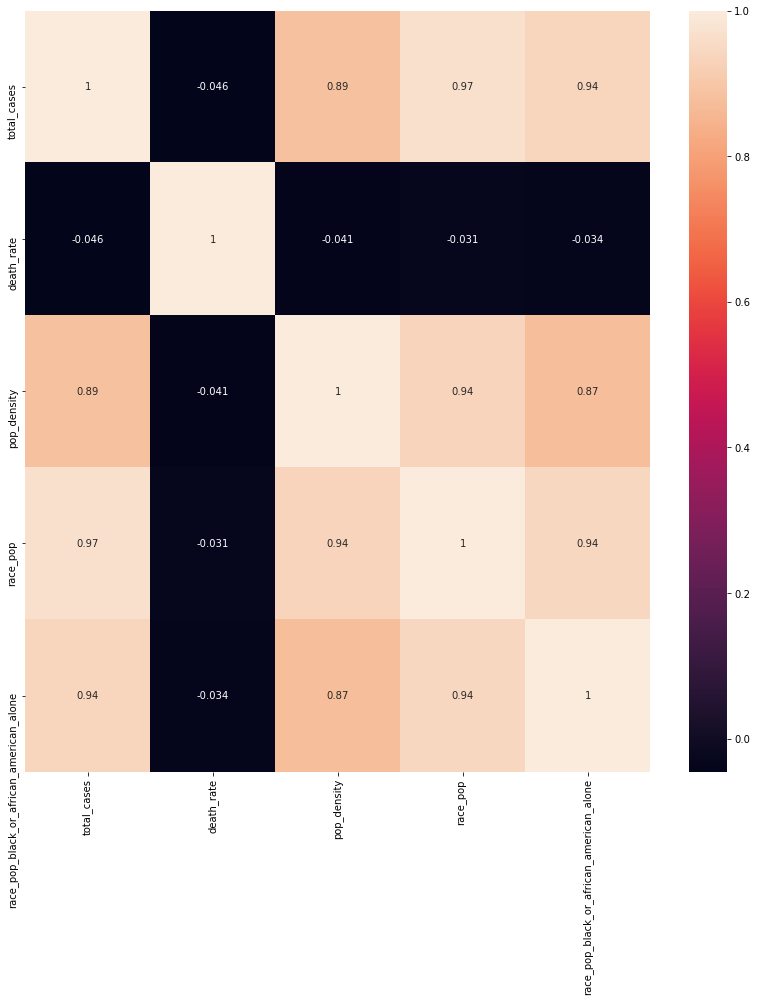

In [271]:
plt.figure(figsize=(14, 14))
sns.heatmap(texas_combined_census[['total_cases', 'death_rate', 'pop_density', 'race_pop', 'race_pop_black_or_african_american_alone']].corr(), annot=True);

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [270]:
lr = LinearRegression()

In [288]:
X = texas_combined_census.drop(columns=['county_name', 'total_cases', 'total_fatalities', 'death_rate'])
y = texas_combined_census['death_rate']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [290]:
lr.fit(X_train, y_train)

LinearRegression()

In [291]:
lr.score(X_test, y_test)

-88840090.84884207

In [292]:
texas_combined_census.sample(20)

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
12,Bee,1845.0,39,0.021138,32691,19152,10392,2535,186,141,...,827,286,271,42032,60273,17390,23636,46326,28808,37.138777
118,Jack,149.0,3,0.020134,8842,1465,6854,415,23,12,...,443,104,137,51700,68400,25626,32456,56388,34067,9.706457
159,Mason,80.0,4,0.050000,8098,2587,4945,148,2,16,...,286,35,95,45329,58607,24409,26869,45357,26534,7.599467
42,Collin,17122.0,174,0.010162,944350,143369,547403,88702,3132,135508,...,69454,39903,47248,94192,120691,43439,50063,76606,53878,1122.521028
168,Montague,245.0,5,0.020408,19409,2111,16694,120,32,0,...,1004,381,274,51774,68340,28457,31811,54199,30751,20.849581
62,Dickens,51.0,2,0.039216,2216,673,1463,68,0,12,...,73,20,20,41618,57230,23452,26317,46406,37422,2.457515
32,Carson,52.0,0,0.000000,6032,600,5186,78,79,31,...,419,116,163,70087,84978,32917,41216,55800,40615,6.554847
120,Jasper,511.0,34,0.066536,35504,2360,26471,5833,62,157,...,1547,335,389,46088,64734,25004,31429,57370,30417,37.824334
141,La Salle,369.0,9,0.024390,20640,4025,14980,903,25,208,...,1088,516,308,58194,73074,28158,30331,52763,35051,28.954564
16,Borden,2.0,0,0.000000,665,56,595,0,0,0,...,80,10,9,81985,85046,33781,48405,54375,41094,0.740994


In [294]:
texas_combined.head(2)

,county_name,total_cases,total_fatalities,death_rate
0,Anderson,2922.0,39,0.013347
1,Andrews,567.0,10,0.017637


In [296]:
texas_combined['county_name'] = [i.lower() for i in texas_combined['county_name']]

In [297]:
texas_combined

,county_name,total_cases,total_fatalities,death_rate
0,anderson,2922.0,39,0.013347
1,andrews,567.0,10,0.017637
2,angelina,2277.0,90,0.039526
3,aransas,340.0,18,0.052941
4,archer,133.0,1,0.007519
...,...,...,...,...
249,wood,621.0,36,0.057971
250,yoakum,289.0,5,0.017301
251,young,497.0,6,0.012072
252,zapata,342.0,9,0.026316


In [299]:
texas_combined.sort_values(by='county_name', ascending=True, inplace=True)

In [300]:
texas_combined.reset_index(inplace=True)

In [301]:
texas_combined.drop(columns='index', inplace=True)
texas_combined

,county_name,total_cases,total_fatalities,death_rate
0,anderson,2922.0,39,0.013347
1,andrews,567.0,10,0.017637
2,angelina,2277.0,90,0.039526
3,aransas,340.0,18,0.052941
4,archer,133.0,1,0.007519
...,...,...,...,...
249,wood,621.0,36,0.057971
250,yoakum,289.0,5,0.017301
251,young,497.0,6,0.012072
252,zapata,342.0,9,0.026316


In [298]:
census_df['county_name'] = [i.lower() for i in census_df['county_name']]
census_df

,county_name,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
0,anderson,57863,10142,34312,12127,158,319,9,15,781,...,1432,422,240,43355,55852,16868,26621,36865,26890,54.452632
1,andrews,17818,9979,7215,321,0,63,21,0,219,...,1214,398,352,74233,94962,31190,40478,72970,35194,11.872960
2,angelina,87607,19174,53216,12834,107,987,5,163,1121,...,3257,985,639,47714,61152,22322,27411,41488,32622,109.813207
3,aransas,24763,6756,16691,365,14,488,0,33,416,...,1047,476,496,44865,75471,30939,21567,43182,32005,98.246769
4,archer,8789,727,7772,76,27,47,0,0,140,...,626,198,145,64476,80073,31806,32469,49105,37377,9.729998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,wood,43815,4313,36273,2335,277,133,37,34,413,...,1996,663,455,48534,68298,27841,28985,49656,34209,67.904439
250,yoakum,8571,5643,2763,25,11,5,0,29,95,...,557,153,142,68814,82418,26519,43250,68603,36103,10.717568
251,young,18114,3332,14176,354,112,89,0,0,51,...,1066,172,131,47194,64653,25855,30734,49142,27542,19.807588
252,zapata,14369,13542,615,0,0,179,0,0,33,...,215,78,82,31113,52009,17228,18938,36461,24946,14.391854


In [302]:
for i, n in zip(texas_combined['county_name'], census_df['county_name']):
    if i == n:
        print(i,' : ', n)
    else:
        print(i, ' : ', n, '---->','BAD')

anderson  :  anderson
andrews  :  andrews
angelina  :  angelina
aransas  :  aransas
archer  :  archer
armstrong  :  armstrong
atascosa  :  atascosa
austin  :  austin
bailey  :  bailey
bandera  :  bandera
bastrop  :  bastrop
baylor  :  baylor
bee  :  bee
bell  :  bell
bexar  :  bexar
blanco  :  blanco
borden  :  borden
bosque  :  bosque
bowie  :  bowie
brazoria  :  brazoria
brazos  :  brazos
brewster  :  brewster
briscoe  :  briscoe
brooks  :  brooks
brown  :  brown
burleson  :  burleson
burnet  :  burnet
caldwell  :  caldwell
calhoun  :  calhoun
callahan  :  callahan
cameron  :  cameron
camp  :  camp
carson  :  carson
cass  :  cass
castro  :  castro
chambers  :  chambers
cherokee  :  cherokee
childress  :  childress
clay  :  clay
cochran  :  cochran
coke  :  coke
coleman  :  coleman
collin  :  collin
collingsworth  :  collingsworth
colorado  :  colorado
comal  :  comal
comanche  :  comanche
concho  :  concho
cooke  :  cooke
coryell  :  coryell
cottle  :  cottle
crane  :  crane
crockett

In [303]:
texas_combined_census = pd.merge(texas_combined, census_df, on='county_name', left_index=True, right_index=True)

In [305]:
texas_combined_census[texas_combined_census['county_name'] == 'mason']

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
156,mason,80.0,4,0.05,4161,978,3029,1,12,92,...,120,80,49,40708,60697,25602,22571,38106,28289,4.479801


In [307]:
texas_combined_census.to_csv('../data/texas_combined_cleaned_WITH_Census_FA.csv', index=False)

In [309]:
texas_combined_census.sample(20, random_state=22)

,county_name,total_cases,total_fatalities,death_rate,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
71,erath,991.0,13,0.013118,41482,8671,31082,674,213,312,...,1716,744,404,48819,67961,25290,23053,42103,32345,38.296568
177,nueces,16136.0,405,0.025099,360486,228462,107652,13071,919,7134,...,18198,6452,5780,55048,74820,27649,30869,48043,34488,430.012072
186,polk,912.0,32,0.035088,47837,7193,33877,4850,693,313,...,1875,691,700,46182,63446,24686,27868,45098,31397,45.255405
224,titus,1562.0,35,0.022407,32730,14015,14871,2953,84,333,...,1142,300,255,46698,59775,20633,26798,38409,29067,80.604447
50,cottle,33.0,3,0.090909,1623,382,867,243,5,0,...,14,20,14,34375,47243,20108,21934,40526,26250,1.802204
15,blanco,153.0,6,0.039216,11279,2173,8712,2,0,165,...,699,268,285,63071,85285,34925,29346,47961,34068,15.902714
128,kaufman,3436.0,55,0.016007,118910,24531,77641,12799,468,1410,...,7606,2822,1424,65390,81752,27411,35454,52527,41538,152.316905
26,burnet,854.0,13,0.015222,45750,10120,33745,831,292,383,...,2399,658,931,59238,79066,30507,27171,46182,36201,46.013890
242,wichita,3134.0,31,0.009892,131818,24818,86518,13116,922,2732,...,5364,1583,1153,46575,62083,23921,25985,41341,31862,210.037062
95,hall,41.0,1,0.024390,3074,1057,1729,239,3,9,...,108,17,30,32921,54817,22846,20659,40734,30060,3.479375


In [310]:
census_df.sample(20, random_state=22)

,county_name,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,race_pop_asian_alone,race_pop_native_hawaiian_and_other_pacific_islander_alone,race_pop_some_other_race_alone,race_pop_two_or_more_races,...,inc_hhlds_100_000_to_149_999,inc_hhlds_150_000_to_199_999,inc_hhlds_200_000_or_more,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,pop_density
71,erath,41482,8671,31082,674,213,312,21,9,500,...,1716,744,404,48819,67961,25290,23053,42103,32345,38.296568
177,nueces,360486,228462,107652,13071,919,7134,242,226,2780,...,18198,6452,5780,55048,74820,27649,30869,48043,34488,430.012072
186,polk,47837,7193,33877,4850,693,313,62,31,818,...,1875,691,700,46182,63446,24686,27868,45098,31397,45.255405
224,titus,32730,14015,14871,2953,84,333,0,40,434,...,1142,300,255,46698,59775,20633,26798,38409,29067,80.604447
50,cottle,1623,382,867,243,5,0,0,89,37,...,14,20,14,34375,47243,20108,21934,40526,26250,1.802204
15,blanco,11279,2173,8712,2,0,165,39,0,188,...,699,268,285,63071,85285,34925,29346,47961,34068,15.902714
128,kaufman,118910,24531,77641,12799,468,1410,46,232,1783,...,7606,2822,1424,65390,81752,27411,35454,52527,41538,152.316905
26,burnet,45750,10120,33745,831,292,383,0,0,379,...,2399,658,931,59238,79066,30507,27171,46182,36201,46.013890
242,wichita,131818,24818,86518,13116,922,2732,59,450,3203,...,5364,1583,1153,46575,62083,23921,25985,41341,31862,210.037062
95,hall,3074,1057,1729,239,3,9,0,0,37,...,108,17,30,32921,54817,22846,20659,40734,30060,3.479375
